In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [3]:
base = pd.read_csv(path_base('db_cartaocredito_clientes.csv'), header = 1)

C:\MyPhyton\DataScience\notebook
C:\MyPhyton\DataScience\data
C:\MyPhyton\DataScience\data\db_cartaocredito_clientes.csv


In [4]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']


In [5]:
X = base.iloc[:,[1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [4]:
#dendrograma = dendrogram(linkage(X, method = 'ward'))



In [5]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(X)



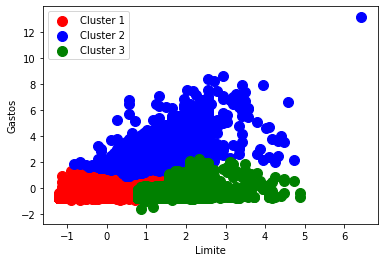

In [6]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()